In [31]:
class Quotient_Ring:
    def __init__(self,n,p,N,d):
        ff.<gen>=GF(p,modulus="primitive") # coeficient field
        self.gen=gen
        self.ff=ff
        assert N%n==0, "{}|{} is false".format(n,N)
        self.p=p
        self.N=N
        self.n=n
        self.d=d
    def __str__(self):
        return "Quotient Ring: ({}) / (x^{}-(w_{})^{})".format(self.ff,self.n,self.N,self.d)
    def denominator(self):
        pr=self.ff["x"]
        x=pr("x")
        return x^self.n-E(self.N)^(self.d)
    def root(self,degree):
        assert (self.p-1)%degree==0, (self.p,degree)
        return self.gen^((self.p-1)/degree)
    def split(self,k):
        return Quotient_Ring(self.n//k,self.p,self.N,self.d)

def get_prime(n):
    N=n
    while not (N+1) in Primes():
        N+=n
    return N+1


In [32]:
def dft(x,qr):
    n=len(x)
    w=qr.root(n)
    #print("DFT_{}: w={}".format(n,w))
    return [sum(x[i]*w^(i*j) for i in range(n)) for j in range(n)]

In [33]:
def fft(x,qr):
    if len(x)==2:
        return dft(x,qr),2
    xe=[x[2*i] for i in range(len(x)//2)]
    xo=[x[2*i+1] for i in range(len(x)//2)]
    ye,w1=fft(xe,qr)
    yo,w2=fft(xo,qr)
    S=[qr.root(len(x))^i*yo[i] for i in range(len(x)//2)]
    y=[ye[i]+S[i] for i in range(len(x)//2)]+[ye[i]-S[i] for i in range(len(x)//2)]
    print(len(x),3//2*len(x)+w1+w2)
    return y,3*len(x)/2+w1+w2


In [39]:
def split(x,base):
    if len(x)==base:
        return x
    y=[[x[2*i] for i in range(len(x)//2)],split([x[2*i+1] for i in range(len(x)//2)],base)]
    return y

def rec_ms(x,qr):
    #print(x)
    if len(x[0])==1:
        return x,0,0
    X_0,mults_0,adds0 = meta_split(x[0],qr)
    X_1,mults_1,adds1 = rec_ms(x[1],qr)
    return [X_0,X_1],mults_0+mults_1,adds0+adds1


def combine(y,qr,depth):
    #print("comb: incoming",y)
    if len(y[0])==1:
        S = [y[0][0]+y[1][0],y[0][0]-y[1][0]]
        #print(depth,S)
        return S,0,2
    S_dp1,mults,adds = combine(y[1],qr,depth+1)
    n=len(y[0])
    s = [qr.root(2*n)^i*S_dp1[i] for i in range(n)]
    #S = [y[0][i%n]+qr.root(2*n)^i*S_dp1[i%n] for i in range(2*n)]
    S = [y[0][i]+s[i] for i in range(n)]+[y[0][i]-s[i] for i in range(n)]
    #print("partial",[qr.root(2*n)^i*S_dp1[i%n] for i in range(2*n)])
    #print(depth,S)
    return S,mults+n,adds+2*n

def meta_split(x,qr):
    n=len(x)
    if n==1:
        return x,0,0
    assert math.log(n,2)%1==0
    y=split(x,1)
    Y,mults0,adds0=rec_ms(y,qr)
    #print(Y)
    #print("combining")
    X,mults1,adds1=combine(Y,qr,0)
    print(len(X),mults0+mults1+adds0+adds1)
    return X,mults0+mults1,adds0+adds1
    


In [40]:
    
n=128
p=get_prime(n)
qr=Quotient_Ring(n,p,n,n)
x=[i*3 for i in range(n)]
#print(split(x,1))
print(fft(x,qr))
print(meta_split(x,qr))

4 8
4 8
8 28
4 8
4 8
8 28
16 80
4 8
4 8
8 28
4 8
4 8
8 28
16 80
32 208
4 8
4 8
8 28
4 8
4 8
8 28
16 80
4 8
4 8
8 28
4 8
4 8
8 28
16 80
32 208
64 512
4 8
4 8
8 28
4 8
4 8
8 28
16 80
4 8
4 8
8 28
4 8
4 8
8 28
16 80
32 208
4 8
4 8
8 28
4 8
4 8
8 28
16 80
4 8
4 8
8 28
4 8
4 8
8 28
16 80
32 208
64 512
128 1216
([226, 48, 159, 9, 237, 85, 75, 220, 43, 125, 20, 84, 217, 100, 181, 189, 104, 40, 248, 81, 224, 54, 91, 57, 127, 204, 253, 62, 211, 210, 143, 201, 53, 187, 225, 27, 154, 17, 197, 42, 1, 47, 31, 122, 95, 74, 70, 234, 128, 33, 146, 238, 93, 32, 216, 16, 222, 245, 28, 175, 24, 246, 72, 117, 65, 13, 58, 141, 106, 212, 102, 142, 165, 114, 171, 98, 37, 149, 241, 97, 2, 153, 60, 56, 35, 8, 99, 83, 129, 88, 190, 113, 233, 103, 162, 200, 77, 186, 244, 177, 176, 68, 134, 183, 3, 73, 39, 76, 163, 49, 139, 90, 26, 198, 206, 30, 170, 46, 110, 5, 87, 167, 55, 45, 150, 121, 228, 82], 1280)
2 2
4 10
2 2
8 32
2 2
4 10
2 2
16 88
2 2
4 10
2 2
8 32
2 2
4 10
2 2
32 224
2 2
4 10
2 2
8 32
2 2
4 10
2 2
16 8

1344

In [130]:
def ms_rt(n):
    #print(n)
    if n==2:
        return 3
    res=3*n//2
    while n>2:
        n/=2
        res+=ms_rt(n)
    return res+2

def split_rt_mult(n):
    if n==4:
        return 3
    if n==2:
        return 1
    return split_rt_mult(n//2)+2*split_rt_mult(n//4)+3*n/4

def ms3_rt(n):
    print(n)
    if n==3:
        return 6
    if n==2:
        return 2
    if n%3!=0:
        return ms_rt(n)
    res=3*n
    n/=3
    res+=ms3_rt(n)
    while n>2:
        n/=2
        res+=2*ms3_rt(n)
    return res

def split(n):
    if n==1:
        return 0
    if n==2:
        return 2
    return split(n/2)+2*split(n/4)+9/4*n
    
#ms3_rt(12)
#print([2^i for i in range(1,10)])
print([ms_rt(2^i) for i in range(1,15)])
#print([ms3_rt(2^i) for i in range(1,10)])
#print([3*2^i*i//2 for i in range(1,10)])
print([split(2^i) for i in range(6,15)])
print([3*2^i*i/2 for i in range(1,15)])
#print([4*2^i*i-6*i for i in range(1,10)])

[1, 7, 20, 52, 128, 304, 704, 1600, 3584, 7936, 17408, 37888, 81920, 176128]
[555, 1301, 2987, 6741, 15019, 33109, 72363, 157013, 338603]
[3, 12, 36, 96, 240, 576, 1344, 3072, 6912, 15360, 33792, 73728, 159744, 344064]


[64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


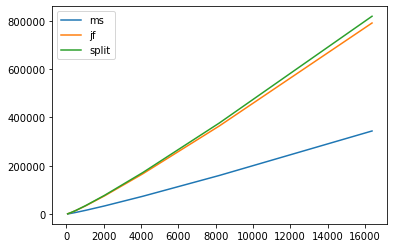

In [102]:
x=[2^i for i in range(6,15)]

#ms_y = [ms_rt(2^i) for i in x]
ms_y=[3*2^i*i//2 for i in range(6,15)]
split_y=[1160,2824,6664,15368,34824,77832,172040,376840,819208]
jf_y=[1152,2792,6552,15048,33968,75688,166856,364680,791264]
jf_mod_y=[34/9*2^i*i for i in range(6,15)]
print(x)
import matplotlib.pyplot as plt
plt.plot(x,ms_y,label="ms")
plt.plot(x,jf_y,label="jf")
#plt.plot(x,jf_mod_y,label="jf_mod")
plt.plot(x,split_y,label="split")
plt.legend()
plt.show()

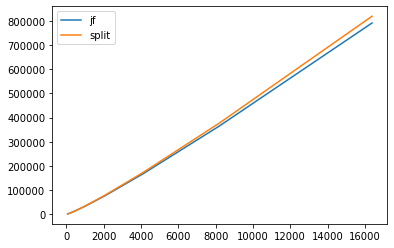

In [107]:
#extended split radix
mults=[4,24,76,208,548,1352,3196,7424,16916,37880,83948,184368]
adds=[52,152,396,976,2340,5448,12412,27904,61972,136184,296940,643120]
ex_split_y=[mults[i]+adds[i] for i in range(len(mults))]
#plt.plot(x[:-1],ex_split_y[4:],label="ex_split")
#plt.plot(x,ms_y,label="ms")
plt.plot(x,jf_y,label="jf")
plt.plot(x,split_y,label="split")
plt.legend()
plt.show()

1/2